<a href="https://colab.research.google.com/github/Far0311/Data-Analysis-with-Phyton/blob/main/Classifier_and_Regressor_of_Titanic_dataset_and_Housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.datasets import fetch_california_housing

# Predict Survival Based on Titanic Passenger Details using Random Forest Classifier

In [8]:
# load dataset
df = pd.read_csv('/content/tested.csv')

In [9]:
# display basic info
display(df.head())
display(df.info())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


None

In [10]:
# drop unnecessary columns
# axis=1 Specifies that we are dropping columns instead of rows.
# inplace=TrueModifies the DataFrame directly instead of creating a new copy
df.drop(["Name", "Ticket", "Cabin"], axis = 1, inplace = True)

In [13]:
# handle missing values
df = df.copy()
df.loc[:, "Age"] = df["Age"].fillna(df["Age"].median())
df.loc[:, "Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [15]:
# Encode categorical variables
# convert categorical variables into numerical format so that machine learning models can process them.
label_encoder = LabelEncoder()
df["Sex"] = label_encoder.fit_transform(df["Sex"])
df["Embarked"] = label_encoder.fit_transform(df["Embarked"])

In [17]:
# Define features and target
X = df.drop(["Survived"], axis = 1)
y = df["Survived"]

In [18]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


In [20]:
# Standardize numerical features
# Fit: Computes the mean and standard deviation of X_train.
# Transform: Uses these computed values to standardize X_train.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
# Train Classifier
model = RandomForestClassifier(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [23]:
# Predictions
y_pred = model.predict(X_test)

In [24]:
# Performance metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [27]:
# 5-fold Cross Validation
cv_scores = cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')
cv_mean = np.mean(cv_scores)

In [29]:
# Display results
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report:\n{report}")
print(f"Confusion Matrix:\n{conf_matrix}")
print(f"5-fold CV Average Score: {cv_mean:.4f}")

Accuracy: 1.0000
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84

Confusion Matrix:
[[50  0]
 [ 0 34]]
5-fold CV Average Score: 1.0000


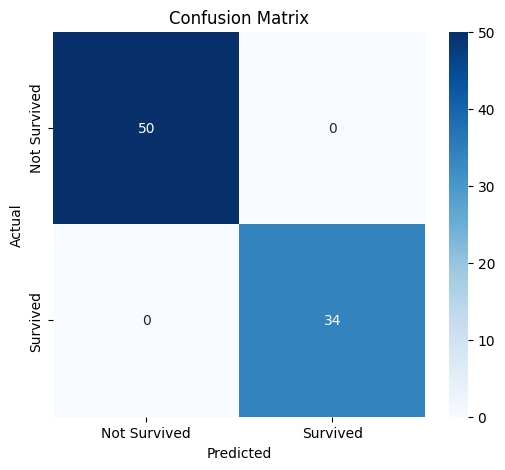

In [30]:
# Visualization
plt.figure(figsize = (6,5))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues', xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Predict House Prices in California using Random Forest Regressor

In [34]:
# Load California Housing Dataset
data_Cali = fetch_california_housing()
df = pd.DataFrame(data_Cali.data, columns = data_Cali.feature_names)
df["Target"] = data_Cali.target

In [35]:
# Display basic info
display(df.head())
display(df.info())

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


None

In [36]:
# Define features and target
X = df.drop(["Target"], axis = 1)
y = df["Target"]

In [37]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [38]:
# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [39]:
# Train regressor
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [40]:
# Predictions
y_pred = model.predict(X_test)

In [41]:
# Performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [42]:
# 5-fold Cross Validation
cv_scores = cross_val_score(model, X, y, cv = 5, scoring = 'r2')
cv_mean = np.mean(cv_scores)

In [45]:
# Display results
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")
print(f"R2 Score: {r2:.4f}")
print(f"5-fold CV Average R2 Score: {cv_mean:.4f}")

Mean Absolute Error: 0.3274
Mean Squared Error: 0.2552
Root Mean Squared Error: 0.5051
R2 Score: 0.8053
5-fold CV Average R2 Score: 0.6561


Mean Absolute Error (MAE): 0.3274
This measures the average absolute difference between actual and predicted values.
Lower is better → On average, predictions deviate by 0.3274 house value units from the actual values.

Mean Squared Error (MSE): 0.2552
This is the average squared difference between actual and predicted values.
Lower is better → Penalizes larger errors more than MAE.

Root Mean Squared Error (RMSE): 0.5051
This is simply the square root of MSE.
Lower is better → Indicates that the model's predictions deviate by about 0.5051 units (~$50,510) on average.

R² Score: 0.8053
Explains how much of the variance in house prices the model captures.
Ranges from 0 to 1:
1.0: Perfect prediction.
0.0: Model explains no variance (random guessing).
Negative: Worse than guessing.
0.8053 means that the model explains 80.53% of the variance in house prices, which is a strong result.

5-Fold Cross-Validation Average R² Score: 0.6561
Ensures the model generalizes well across different subsets of the data.
Lower than R² on test data (0.8053) indicates some variance in performance across different samples.
A difference between test R² and CV R² suggests potential overfitting.

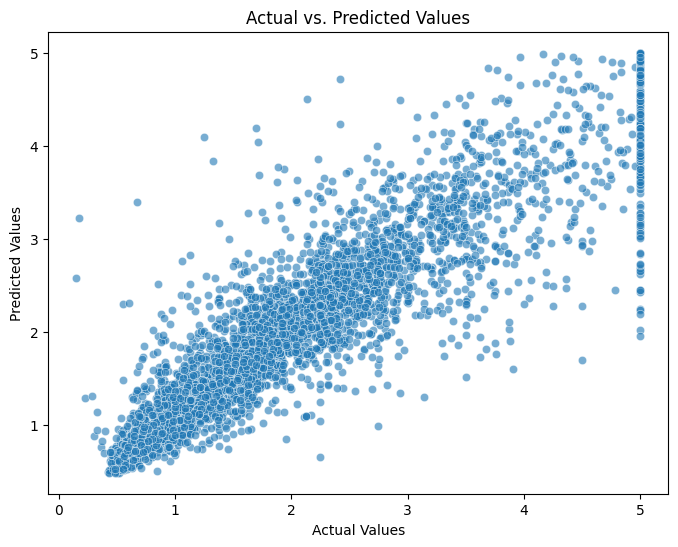

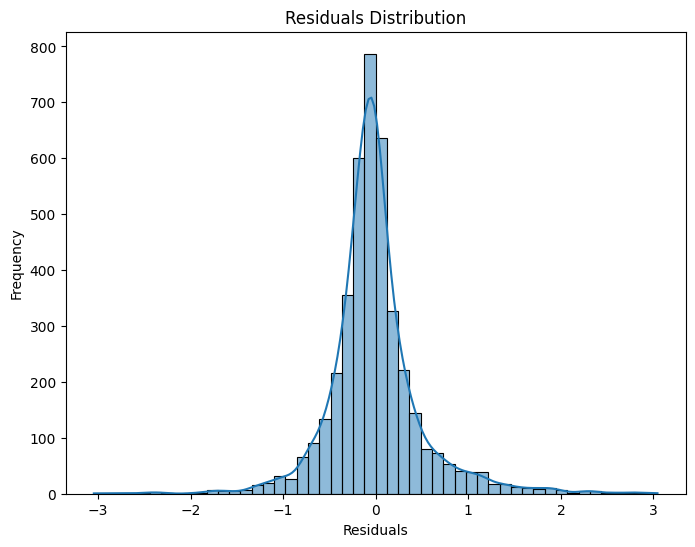

In [47]:
# Visualization
plt.figure(figsize = (8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(y_test - y_pred, bins=50, kde=True)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Residuals Distribution")
plt.show()

**Actual vs. Predicted Scatter Plot**

Shows how well predictions align with actual values.
If perfect, all points would lie on the diagonal y = x line.
The scatter shows a good correlation but some variance.


**Residuals Distribution**

Residuals (errors) are centered around zero → good sign.
The shape is approximately normal, indicating a well-fitted model.


---


Strong model performance: 80.53% variance explained, errors around $32K to $50K.
Slight overfitting risk: CV score (0.6561) is lower than test R² (0.8053).
